In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import read_nml as rnl

from Utils import numerical_utils as nuti
from Utils import constants as Co

print( Co.cpair())

cpair = Co.cpair()
grav= Co.grav()

1004.6480897776704


In [2]:
# Replace with your path
case='camsnap-MomConsrv-x02'
odir = f"../cases/{case}"

nml_path = f"{odir}/atm_in"

nml = rnl.read_namelist(nml_path)
group_name, active = rnl.choose_active_group(nml)

print(f"Active group: {group_name}")
# Access fields robustly
bnd_topo = active.get('bnd_topo')
ncdata = active.get('ncdata')
scale = active.get('scale_dry_air_mass')
use_topo = active.get('use_topo_file')

print("bnd_topo:", bnd_topo)
print("ncdata:", ncdata)
print("scale_dry_air_mass:", scale)
print("use_topo_file:", use_topo)


Active group: cam_initfiles_nl_camsnap
bnd_topo: /glade/work/juliob/bndtopo/ne30pg3_gmted2010_modis_bedmachine_nc3000_Laplace0100_noleak_20240720.nc
ncdata: /glade/derecho/scratch/juliob/archive/ndg_x02_ne30pg3_fmt_c64109/atm/hist/ndg_x02_ne30pg3_fmt_c64109.cam.h2i.2004-06-15-00000.nc
scale_dry_air_mass: 98288.0
use_topo_file: True


In [3]:
print( active )

{'bnd_topo': '/glade/work/juliob/bndtopo/ne30pg3_gmted2010_modis_bedmachine_nc3000_Laplace0100_noleak_20240720.nc', 'ncdata': '/glade/derecho/scratch/juliob/archive/ndg_x02_ne30pg3_fmt_c64109/atm/hist/ndg_x02_ne30pg3_fmt_c64109.cam.h2i.2004-06-15-00000.nc', 'scale_dry_air_mass': 98288.0, 'use_topo_file': True, 'ncdata_type': 'camsnap'}


In [4]:
#read GW.dat file

%run -i read_gwdat_block.py


Dimensions read from file: ncol=48600, nlev=93
Boolean use_gw_rdg_beta and use_gw_movmtn_pbl vars => True True


In [5]:
print( tau.shape )

(48600, 94)


In [6]:

print( ncdata )
print(active['ncdata_type'])


/glade/derecho/scratch/juliob/archive/ndg_x02_ne30pg3_fmt_c64109/atm/hist/ndg_x02_ne30pg3_fmt_c64109.cam.h2i.2004-06-15-00000.nc
camsnap


In [7]:
#
X=xr.open_dataset( ncdata )

In [8]:
X

<xarray.Dataset> Size: 368MB
Dimensions:       (ncol: 48600, lev: 93, ilev: 94, time: 1, trop_pref: 84,
                   trop_prefi: 85, trop_cld_lev: 84)
Coordinates:
  * lev           (lev) float64 744B 0.008135 0.01834 0.03482 ... 991.2 997.5
  * ilev          (ilev) float64 752B 0.004259 0.01201 0.02467 ... 995.1 1e+03
  * trop_pref     (trop_pref) float64 672B 1.196 1.891 2.804 ... 991.2 997.5
  * trop_prefi    (trop_prefi) float64 680B 0.9031 1.489 2.293 ... 995.1 1e+03
  * trop_cld_lev  (trop_cld_lev) float64 672B 1.196 1.891 2.804 ... 991.2 997.5
  * time          (time) object 8B 2004-06-15 00:00:00
Dimensions without coordinates: ncol
Data variables: (12/62)
    lat           (ncol) float64 389kB ...
    lon           (ncol) float64 389kB ...
    areawt        (ncol) float64 389kB ...
    area          (ncol) float64 389kB ...
    hyam          (lev) float64 744B ...
    hybm          (lev) float64 744B ...
    ...            ...
    TAUM1_DIAG    (time, ilev, ncol) float32 18MB ...
    ZIEGW         (time, ilev, ncol) float32 18MB ...
    TAUM1_DIAG_A  (time, ilev, ncol) float32 18MB ...
    TAUM1_DIAG_B  (time, ilev, ncol) float32 18MB ...
    TAU1RDGBETAM  (time, ilev, ncol) float32 18MB ...
    TAU_MOVMTN    (time, ilev, ncol) float32 18MB ...
Attributes:
    ne:                30
    fv_nphys:          3
    Conventions:       CF-1.0
    source:            CAM
    case:              ndg_x02_ne30pg3_fmt_c64109
    logname:           juliob
    host:              dec0627
    initial_file:      /glade/campaign/cgd/amp/juliob/ERA5/ne30np4/L93/ERA5_x...
    topography_file:   /glade/work/juliob/bndtopo/ne30pg3_gmted2010_modis_bed...
    model_doi_url:     not_set
    time_period_freq:  hour_6

In [9]:
u_cam=X.UEGW.values
print( u_cam.dtype )

float32


In [10]:
lon = X.lon.values
lat = X.lat.values

taudsw_cam = X.TAUDSW1.values
tauoro_cam = X.TAUORO1.values
tau_a_cam = X.TAUM1_DIAG_A.values
tau_b_cam = X.TAUM1_DIAG_B.values
tau_diag_cam = X.TAUM1_DIAG.values
tau_cam=X.TAU1RDGBETAM.values
ubm_cam=X.UBM1BETA.values
zm_cam=X.ZMEGW.values
zi_cam=X.ZIEGW.values
mxdis=X.MXDIS1.values
tau_movmtn_cam = X.TAU_MOVMTN.values


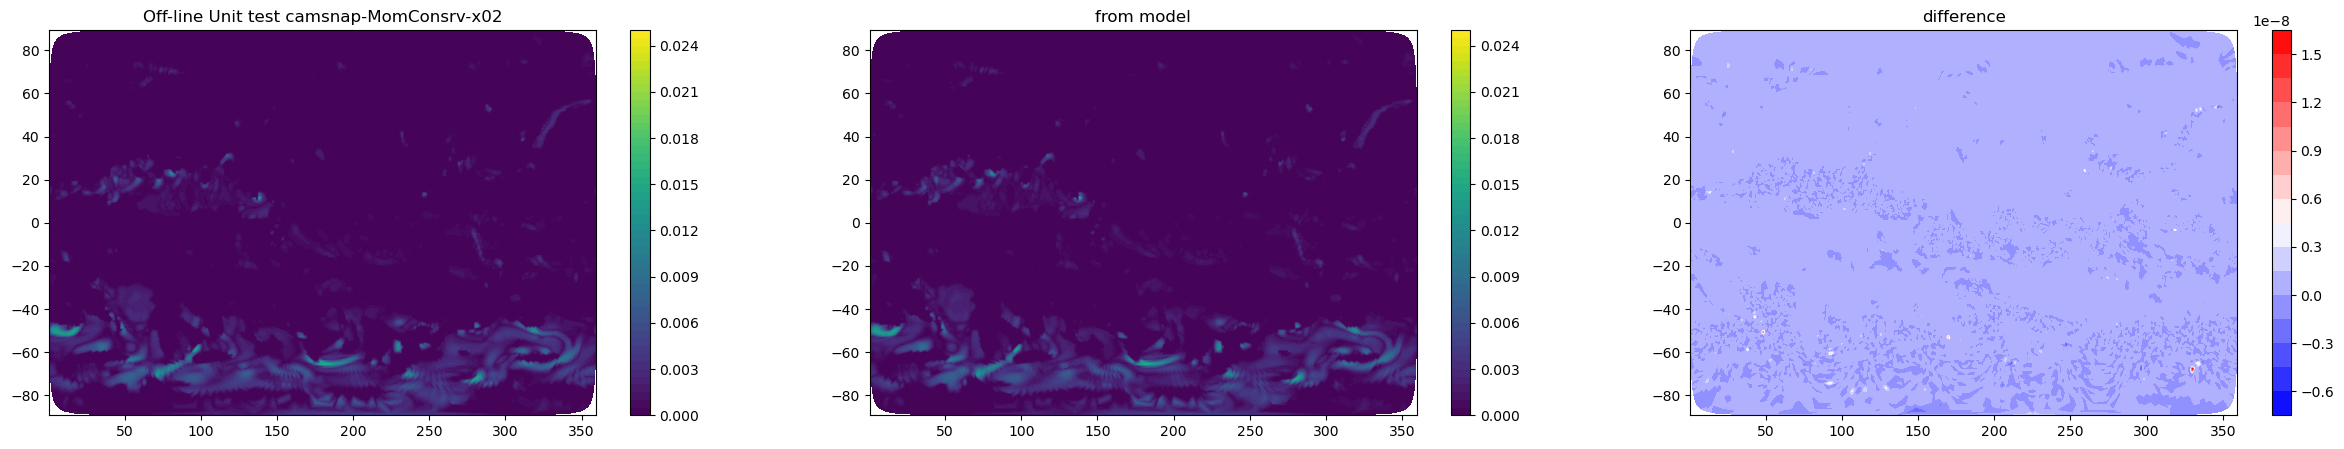

In [11]:
z=20
lev=0.01*np.linspace(0.,2.5,num=51)
fig,axs=plt.subplots(1,3,figsize=(30,5))
ax=axs[0]
co=ax.tricontourf( lon,lat, tau_movmtn.T[z,:], levels=lev )
ax.set_title( f"Off-line Unit test {case}" )
plt.colorbar(co)
ax=axs[1]
co=ax.tricontourf( lon,lat, tau_movmtn_cam[0,z,:], levels=lev )
ax.set_title( "from model" )
plt.colorbar(co)
ax=axs[2]
co=ax.tricontourf( lon,lat, tau_movmtn_cam[0,z,:]-tau_movmtn.T[z,:] , levels=21 , cmap='bwr' )
ax.set_title( "difference" )
plt.colorbar(co)
#co=ax[1].tricontourf( lon,lat, tau_diag.T[z,:], levels=lev )
#plt.colorbar(co)


Text(0.5, 0, 'Model momentum flux')

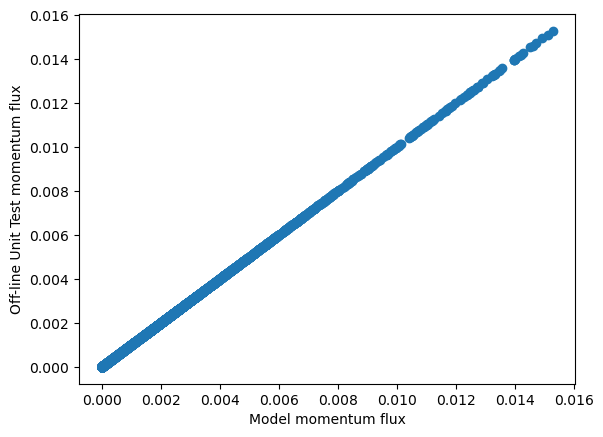

In [12]:
plt.scatter( tau_movmtn_cam[0,z,:],tau_movmtn.T[z,:])
plt.ylabel("Off-line Unit Test momentum flux")
plt.xlabel("Model momentum flux")


(39865.0, 39870.0)

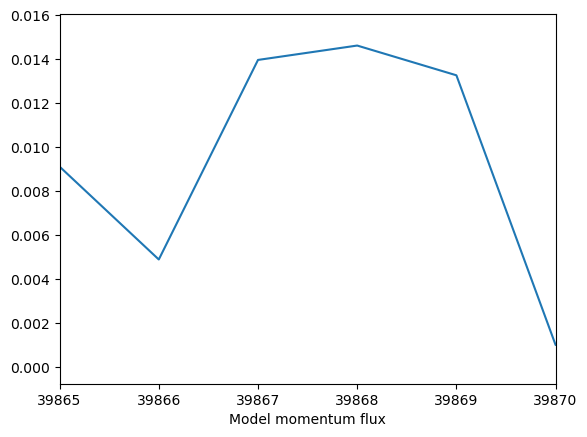

In [13]:
plt.plot( tau_movmtn_cam[0,z,:])
plt.xlabel("Model momentum flux")
plt.xlim(39865,39870)


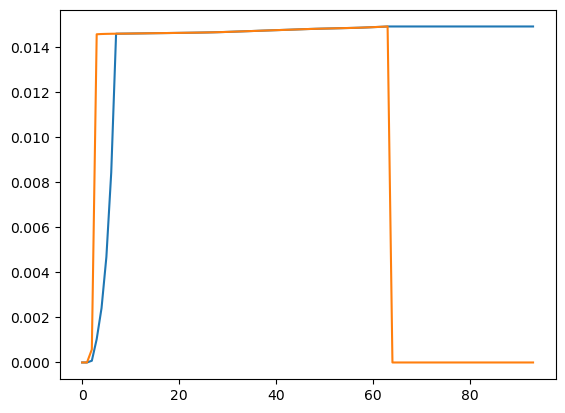

In [14]:
c=39868
plt.plot( tau_movmtn_cam[0,:,c] )
plt.plot( tau_diag_movmtn[c,:] )


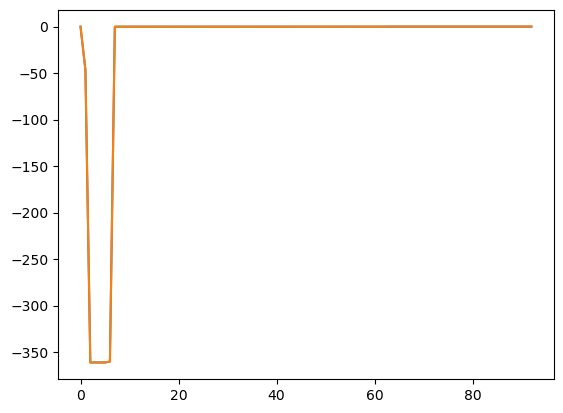

In [29]:
c=39868
scale=86_400.
plt.plot( scale*utgw_prefix_movmtn[c,:] )
plt.plot( scale*utgw_movmtn[c,:] )
#plt.ylim( (-1.e-5,1.e-5 ))


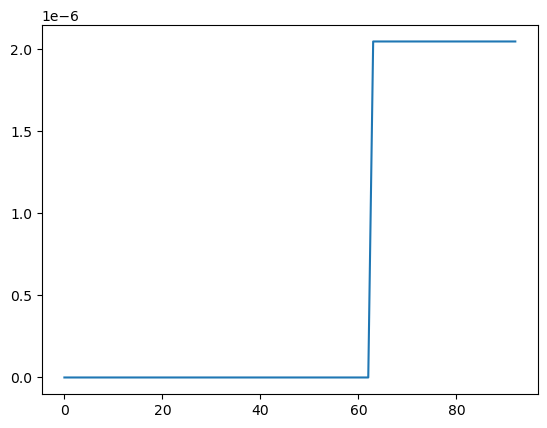

In [26]:
c=39868
plt.plot( utgw_movmtn[c,:] - utgw_prefix_movmtn[c,:] )




In [25]:
print(um_flux[c]  , vm_flux[c],   np.sqrt( um_flux[c]**2 + vm_flux[c]**2 ),        tau_movmtn[c,63])

-0.01345043252118911 0.006411368823277125 0.014900328358635306 0.014900328358635306


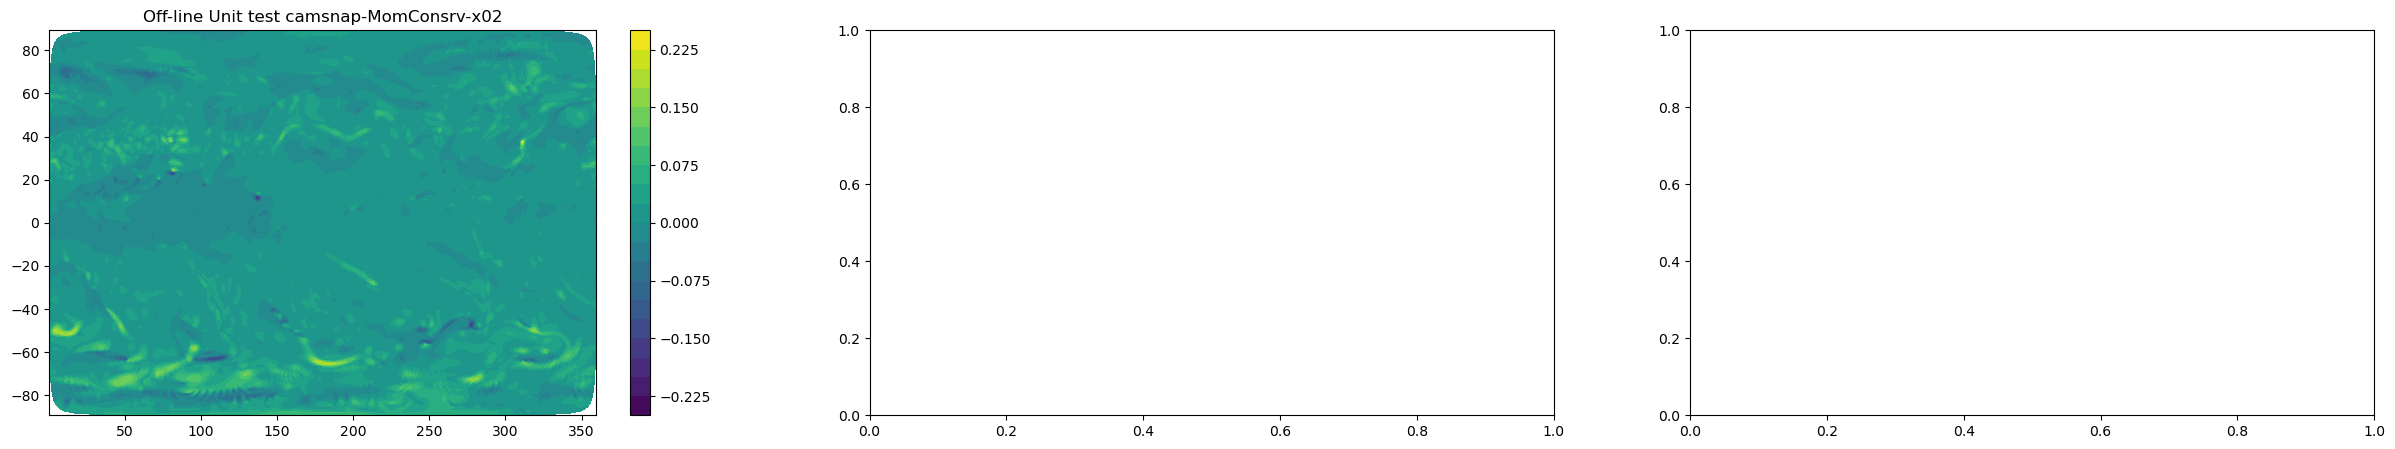

In [33]:
scale=86_400.
z=70
lev=21 #0.01*np.linspace(0.,2.5,num=51)
fig,axs=plt.subplots(1,3,figsize=(30,5))
ax=axs[0]
co=ax.tricontourf( lon,lat, scale*utgw_movmtn.T[z,:], levels=lev )
ax.set_title( f"Off-line Unit test {case}" )
plt.colorbar(co)
